# Lego database analysis

### Datacamp: [Link](https://www.datacamp.com/projects/10)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.crazycomicsandgames.it/wp-content/uploads/2022/02/LEGO-Banner.jpeg")

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

In [3]:
# Importing Data

filepath1="sets.csv"
dfs=pd.read_csv(filepath1,delimiter=",")

filepath2="parent_themes.csv"
dfp=pd.read_csv(filepath2,delimiter=",")

filepath3="themes.csv"
dft=pd.read_csv(filepath3,delimiter=",")

### 1. Exploring Data

In [4]:
dfs.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [5]:
dfs.shape
f"{dfs.shape[0]} Rows by {dfs.shape[1]} Columns"

'11866 Rows by 5 Columns'

In [6]:
dfp.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [7]:
dfp.shape
f"{dfp.shape[0]} Rows by {dfp.shape[1]} Columns"

'111 Rows by 3 Columns'

In [8]:
dft.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [9]:
dft.shape
f"{dft.shape[0]} Rows by {dft.shape[1]} Columns"

'614 Rows by 3 Columns'

### 2. Cleaning up the Data!

In [10]:
filter=dfs.name.str.contains("Star Wars")
dfs.loc[filter].sample(frac=0.1)

,set_num,name,year,theme_id,num_parts
11338,DKSWYoda-1,LEGO Star Wars: The Yoda Chronicles,2013,497,0
9202,8002-1,Destroyer Droid™ / Star Wars Destroyer Droid,2000,158,567
9864,852844-1,Star Wars Magnet Set,2010,501,16
1906,2856130-1,LEGO® Star Wars™ Yoda™ Minifigure Watch,2011,501,0
8161,75023-21,"Advent Calendar 2013, Star Wars (Day 20) - Jed...",2013,225,13
8217,75056-21,Advent Calendar 2014 Star Wars (Day 20) - Impe...,2014,225,11
8159,75023-2,"Advent Calendar 2013, Star Wars (Day 1) - R5-F7",2013,225,4
3851,4195641-1,Star Wars Co-Pack of 7142 and 7152,2002,169,2
10827,9509-7,"Advent Calendar 2012, Star Wars (Day 6) - Batt...",2012,225,5
8216,75056-20,Advent Calendar 2014 Star Wars (Day 19) - Holi...,2014,225,19


In [11]:
dfs.rename(columns=({"name":"set_name"}),inplace=True)
dfs.sample()

,set_num,set_name,year,theme_id,num_parts
4026,4349-2,Wild Pod (polybag),2004,478,41


In [12]:
filter=dfp.name.str.contains("Star Wars")
dfp.loc[filter]

,id,name,is_licensed
7,158,Star Wars,True


In [13]:
dfp.rename(columns=({"id":"parent_id","name":"parent_name"}),inplace=True)
dfp.sample()

,parent_id,parent_name,is_licensed
88,561,The Hobbit and Lord of the Rings,True


In [14]:
filter=dft.name.str.contains("Star Wars")
dft.loc[filter]

,id,name,parent_id
17,18,Star Wars,1.0
157,158,Star Wars,NaN
159,160,Star Wars Clone Wars,159.0
160,161,Star Wars Episode 2,159.0
161,162,Star Wars Episode 3,159.0
162,163,Star Wars Episode 4/5/6,159.0
163,164,Star Wars Episode 1,159.0
164,165,Star Wars Clone Wars,158.0
165,166,Star Wars Episode 1,158.0
166,167,Star Wars Episode 2,158.0


In [15]:
dft.rename(columns=({"id":"theme_id","name":"theme_name"}),inplace=True)
dft.sample()

,theme_id,theme_name,parent_id
426,427,Holiday,425.0


In [16]:
# Merging Theme and sets tables

sets_df=pd.merge(left=dfs,right=dft,on="theme_id")
sets_df

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,Supplemental,67.0
...,...,...,...,...,...,...,...
11828,K6762-1,Western Kit,2002,475,3,Western,NaN
11829,K7623-1,Indiana Jones Classic Adventures Collection,2008,264,4,Indiana Jones,NaN
11830,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,Pirates,425.0
11831,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,Pirates,425.0


In [17]:
# Merging new sets and parent tables

sets_df=pd.merge(left=sets_df,right=dfp,on="parent_id")
sets_df

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,413,147,Building,411.0,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,413,149,Building,411.0,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,413,126,Building,411.0,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,413,3,Building,411.0,Legoland,False
...,...,...,...,...,...,...,...,...,...
5815,LLCABR2-1,Hau Mask - Blue Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,False
5816,LLCABR3-1,Hau Mask - Red Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,False
5817,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,Pirates,425.0,Legoland Parks,False
5818,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,Pirates,425.0,Legoland Parks,False


In [18]:
sets_df["is_licensed"]=sets_df.is_licensed.replace(False,"No")
sets_df["is_licensed"]=sets_df.is_licensed.replace(True,"Yes")
sets_df

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0,Legoland,No
1,00-2,Weetabix Promotional House 1,1976,413,147,Building,411.0,Legoland,No
2,00-3,Weetabix Promotional House 2,1976,413,149,Building,411.0,Legoland,No
3,00-4,Weetabix Promotional Windmill,1976,413,126,Building,411.0,Legoland,No
4,00-7,Weetabix Promotional Lego Village,1976,413,3,Building,411.0,Legoland,No
...,...,...,...,...,...,...,...,...,...
5815,LLCABR2-1,Hau Mask - Blue Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,No
5816,LLCABR3-1,Hau Mask - Red Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,No
5817,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,Pirates,425.0,Legoland Parks,No
5818,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,Pirates,425.0,Legoland Parks,No


### 3. Analyse Data

In [19]:
# Making copy

sets=sets_df.copy()

#### 1. What percentage of all licensed sets ever released were Star Wars themed?

In [20]:
sets

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0,Legoland,No
1,00-2,Weetabix Promotional House 1,1976,413,147,Building,411.0,Legoland,No
2,00-3,Weetabix Promotional House 2,1976,413,149,Building,411.0,Legoland,No
3,00-4,Weetabix Promotional Windmill,1976,413,126,Building,411.0,Legoland,No
4,00-7,Weetabix Promotional Lego Village,1976,413,3,Building,411.0,Legoland,No
...,...,...,...,...,...,...,...,...,...
5815,LLCABR2-1,Hau Mask - Blue Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,No
5816,LLCABR3-1,Hau Mask - Red Brick (Legoland California),2001,426,168,Bionicle,425.0,Legoland Parks,No
5817,llca27-1,Legoland Pirate with Parrot (Legoland California),2006,430,70,Pirates,425.0,Legoland Parks,No
5818,LLCA29-1,Pirate Treasure Chest Bank (LLCA Ambassador Pa...,2006,430,215,Pirates,425.0,Legoland Parks,No


In [21]:
# Extracting license sets

filter=sets.is_licensed=="Yes"
licensed_sets=sets.loc[filter]
licensed_sets

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
2230,10075-1,Spider-Man Action Pack,2002,488,25,Spider-Man,482.0,Super Heroes,Yes
2231,1374-1,Green Goblin,2002,488,59,Spider-Man,482.0,Super Heroes,Yes
2232,1376-1,Spider-Man Action Studio,2002,488,249,Spider-Man,482.0,Super Heroes,Yes
2233,30302-1,Spider-Man,2014,488,45,Spider-Man,482.0,Super Heroes,Yes
2234,30305-1,Spider-Man Super Jumper,2015,488,38,Spider-Man,482.0,Super Heroes,Yes
...,...,...,...,...,...,...,...,...,...
5301,4766-1,Graveyard Duel,2005,248,551,Goblet of Fire,246.0,Harry Potter,Yes
5302,4767-1,Harry and the Hungarian Horntail,2005,248,265,Goblet of Fire,246.0,Harry Potter,Yes
5303,4768-1,The Durmstrang Ship,2005,248,552,Goblet of Fire,246.0,Harry Potter,Yes
5304,4768-2,The Durmstrang Ship with Bonus Mini - Figures ...,2005,248,544,Goblet of Fire,246.0,Harry Potter,Yes


In [22]:
# Total Licensed Lego Sets

total_licensed=licensed_sets.shape[0]
total_licensed

734

In [23]:
filter=licensed_sets.theme_name.str.contains("Star Wars")
star_wars=licensed_sets.loc[filter]
star_wars

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
2612,10123-1,Cloud City,2003,169,707,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2613,10131-1,TIE Fighter Collection,2004,169,688,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2614,10144-1,Sandcrawler,2005,169,1679,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2615,10178-1,Motorized Walking AT-AT,2007,169,1137,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2616,10198-1,Tantive IV,2009,169,1408,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
...,...,...,...,...,...,...,...,...,...
3055,75190-1,First Order Star Destroyer,2017,612,1408,Star Wars Episode 8,158.0,Star Wars,Yes
3056,75526-1,Elite TIE Fighter Pilot,2017,612,94,Star Wars Episode 8,158.0,Star Wars,Yes
3057,75528-1,Rey,2017,612,83,Star Wars Episode 8,158.0,Star Wars,Yes
3058,75529-1,Elite Praetorian Guard,2017,612,88,Star Wars Episode 8,158.0,Star Wars,Yes


In [24]:
#star_wars.to_csv("star_wars(final).csv",index=False)

In [25]:
total_starwars=star_wars.shape[0]
total_starwars

383

In [26]:
print(f"The total licensed lego sets are {total_licensed} and the percentage of Star Wars is: {round(total_starwars/total_licensed*100,2)}%")

The total licensed lego sets are 734 and the percentage of Star Wars is: 52.18%


### 2. Which is the most popular Star Wars Licensed theme (In terms of number of sets released)?

In [27]:
star_wars

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
2612,10123-1,Cloud City,2003,169,707,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2613,10131-1,TIE Fighter Collection,2004,169,688,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2614,10144-1,Sandcrawler,2005,169,1679,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2615,10178-1,Motorized Walking AT-AT,2007,169,1137,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2616,10198-1,Tantive IV,2009,169,1408,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
...,...,...,...,...,...,...,...,...,...
3055,75190-1,First Order Star Destroyer,2017,612,1408,Star Wars Episode 8,158.0,Star Wars,Yes
3056,75526-1,Elite TIE Fighter Pilot,2017,612,94,Star Wars Episode 8,158.0,Star Wars,Yes
3057,75528-1,Rey,2017,612,83,Star Wars Episode 8,158.0,Star Wars,Yes
3058,75529-1,Elite Praetorian Guard,2017,612,88,Star Wars Episode 8,158.0,Star Wars,Yes


In [28]:
# This is the list that contains the most popular Star Wars Legos sets 
starwars_themes=star_wars.groupby(["theme_name"],as_index=False).is_licensed.count().sort_values("is_licensed",ascending=False)
starwars_themes

,theme_name,is_licensed
4,Star Wars Episode 4/5/6,120
0,Star Wars Clone Wars,62
1,Star Wars Episode 1,46
3,Star Wars Episode 3,34
9,Star Wars Rebels,25
8,Star Wars Other,24
2,Star Wars Episode 2,23
5,Star Wars Episode 7,20
10,Star Wars Rogue One,14
6,Star Wars Episode 8,12


In [29]:
print(f"The most popular Star Wars theme is: Star Wars Episode 4/5/6 with {starwars_themes.is_licensed.max()} sets released")

The most popular Star Wars theme is: Star Wars Episode 4/5/6 with 120 sets released


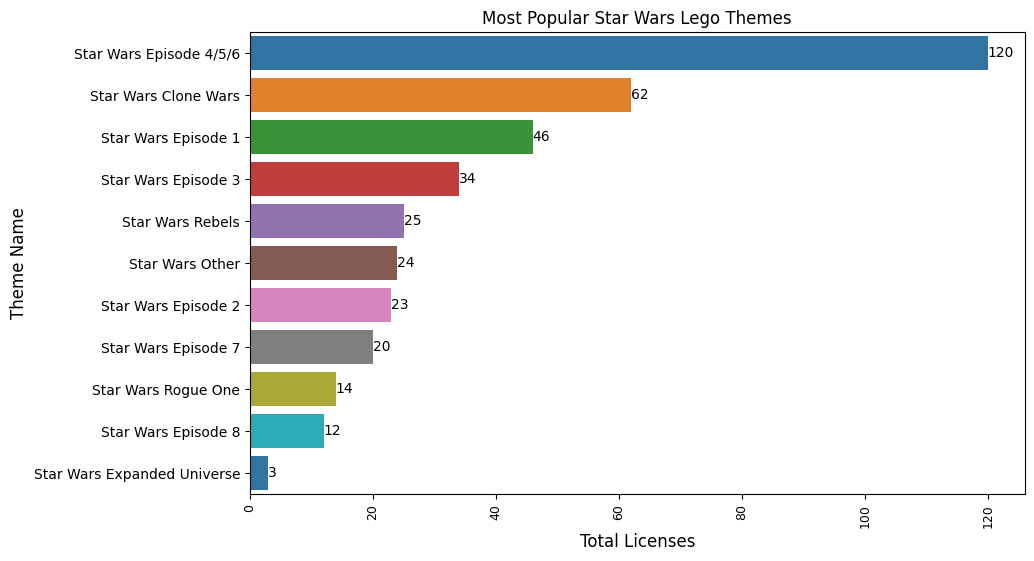

In [30]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="is_licensed",y="theme_name",data=starwars_themes,hue="theme_name",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Most Popular Star Wars Lego Themes")
plt.xlabel("Total Licenses",fontsize=12)
plt.ylabel("Theme Name",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

### 3. Which is the total of licensed Parent Themes of Star Wars released by year and how it behaved?

In [31]:
star_wars

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
2612,10123-1,Cloud City,2003,169,707,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2613,10131-1,TIE Fighter Collection,2004,169,688,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2614,10144-1,Sandcrawler,2005,169,1679,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2615,10178-1,Motorized Walking AT-AT,2007,169,1137,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2616,10198-1,Tantive IV,2009,169,1408,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
...,...,...,...,...,...,...,...,...,...
3055,75190-1,First Order Star Destroyer,2017,612,1408,Star Wars Episode 8,158.0,Star Wars,Yes
3056,75526-1,Elite TIE Fighter Pilot,2017,612,94,Star Wars Episode 8,158.0,Star Wars,Yes
3057,75528-1,Rey,2017,612,83,Star Wars Episode 8,158.0,Star Wars,Yes
3058,75529-1,Elite Praetorian Guard,2017,612,88,Star Wars Episode 8,158.0,Star Wars,Yes


In [32]:
star_wars_years=star_wars.groupby(["year","parent_name"],as_index=False).is_licensed.count()
star_wars_years

,year,parent_name,is_licensed
0,1999,Star Wars,13
1,2000,Star Wars,21
2,2001,Star Wars,10
3,2002,Star Wars,21
4,2003,Star Wars,18
5,2004,Star Wars,9
6,2005,Star Wars,21
7,2006,Star Wars,9
8,2007,Star Wars,15
9,2008,Star Wars,17


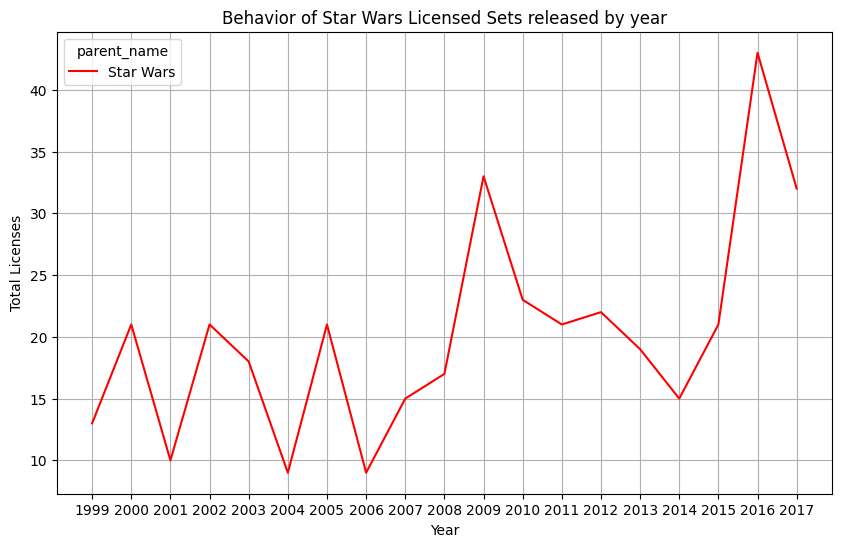

In [33]:
years=[year for year,star_wars_years in star_wars.groupby("year")]
plt.figure(figsize=(10,6))
sns.lineplot(x="year",y="is_licensed",data=star_wars_years,hue="parent_name",palette=["red"])
plt.xlabel("Year")
plt.ylabel("Total Licenses")
plt.title("Behavior of Star Wars Licensed Sets released by year")
plt.xticks(years)
plt.grid()
plt.show()

### 4. In which year was Star Wars the most popular licensed theme (In terms of number of sets released that year)?

In [34]:
star_wars

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,parent_name,is_licensed
2612,10123-1,Cloud City,2003,169,707,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2613,10131-1,TIE Fighter Collection,2004,169,688,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2614,10144-1,Sandcrawler,2005,169,1679,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2615,10178-1,Motorized Walking AT-AT,2007,169,1137,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
2616,10198-1,Tantive IV,2009,169,1408,Star Wars Episode 4/5/6,158.0,Star Wars,Yes
...,...,...,...,...,...,...,...,...,...
3055,75190-1,First Order Star Destroyer,2017,612,1408,Star Wars Episode 8,158.0,Star Wars,Yes
3056,75526-1,Elite TIE Fighter Pilot,2017,612,94,Star Wars Episode 8,158.0,Star Wars,Yes
3057,75528-1,Rey,2017,612,83,Star Wars Episode 8,158.0,Star Wars,Yes
3058,75529-1,Elite Praetorian Guard,2017,612,88,Star Wars Episode 8,158.0,Star Wars,Yes


In [35]:
year_starwars=pd.DataFrame(star_wars.groupby(["year","theme_name"]).is_licensed.count()).reset_index()
year_starwars

,year,theme_name,is_licensed
0,1999,Star Wars Episode 1,8
1,1999,Star Wars Episode 4/5/6,5
2,2000,Star Wars Episode 1,12
3,2000,Star Wars Episode 4/5/6,8
4,2000,Star Wars Other,1
...,...,...,...
71,2017,Star Wars Episode 4/5/6,4
72,2017,Star Wars Episode 7,2
73,2017,Star Wars Episode 8,12
74,2017,Star Wars Rebels,4


In [36]:
# The most popular Star Wars Themes by year

year_starwars=year_starwars.sort_values(["year","is_licensed"],ascending=[True,False]).groupby("year").head(1)
year_starwars

,year,theme_name,is_licensed
0,1999,Star Wars Episode 1,8
2,2000,Star Wars Episode 1,12
6,2001,Star Wars Episode 4/5/6,6
8,2002,Star Wars Episode 2,9
12,2003,Star Wars Episode 4/5/6,14
15,2004,Star Wars Episode 4/5/6,8
16,2005,Star Wars Episode 3,17
19,2006,Star Wars Episode 4/5/6,7
22,2007,Star Wars Episode 4/5/6,6
24,2008,Star Wars Clone Wars,11


In [39]:
#year_starwars.to_csv("year_starwars(final).csv",index=False)

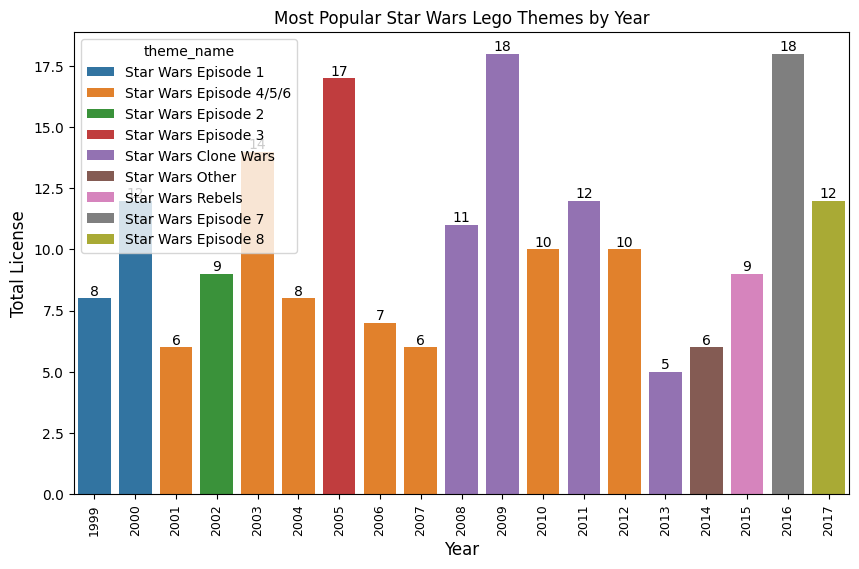

In [37]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="year",y="is_licensed",data=year_starwars,hue="theme_name",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Most Popular Star Wars Lego Themes by Year")
plt.xlabel("Year",fontsize=12)
plt.ylabel("Total License",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

### 4. Report

#### Google Looker: ["The Force be With you"](https://lookerstudio.google.com/reporting/77554a1d-db27-4c5d-8a2c-dd6ecae9d2e3)